In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.io as pio

In [3]:
df=pd.read_csv(r"D:\Guvi_Data_Science\MDT33\Capstone_Project\Singapore-Resale-Flat\1990-1999\combined.csv")
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN


In [4]:
df1=pd.read_csv(r"D:\Guvi_Data_Science\MDT33\Capstone_Project\Singapore-Resale-Flat\1990-1999\combined_1.csv")
df1.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN


In [5]:
df.shape

(932109, 11)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932109 entries, 0 to 932108
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                932109 non-null  object 
 1   town                 932109 non-null  object 
 2   flat_type            932109 non-null  object 
 3   block                932109 non-null  object 
 4   street_name          932109 non-null  object 
 5   storey_range         932109 non-null  object 
 6   floor_area_sqm       932109 non-null  float64
 7   flat_model           932109 non-null  object 
 8   lease_commence_date  932109 non-null  int64  
 9   resale_price         932109 non-null  float64
 10  remaining_lease      223059 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.2+ MB


In [7]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,932109.0,95.687746,25.816917,28.0,73.0,93.0,113.0,366.7
lease_commence_date,932109.0,1988.329336,10.717058,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,932109.0,322327.906797,171920.112563,5000.0,194000.0,298500.0,420000.0,1588000.0


Data Preprocessing

In [9]:
df.nunique()

month                   415
town                     27
flat_type                 8
block                  2712
street_name             584
storey_range             25
floor_area_sqm          213
flat_model               34
lease_commence_date      55
resale_price           9587
remaining_lease         727
dtype: int64

In [10]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [11]:
df['remaining_lease'].unique()

array([nan, '70', '65', '64', '63', '62', '69', '60', '61', '86', '77',
       '80', '90', '87', '66', '58', '94', '71', '68', '84', '73', '79',
       '76', '72', '82', '74', '67', '88', '81', '89', '53', '54', '55',
       '57', '93', '83', '85', '92', '91', '59', '95', '52', '51', '56',
       '75', '96', '78', '50', '97', '49', '48', '61 years 04 months',
       '60 years 07 months', '62 years 05 months', '62 years 01 month',
       '63 years', '61 years 06 months', '58 years 04 months',
       '59 years 08 months', '59 years 06 months', '60 years',
       '62 years 08 months', '61 years', '60 years 10 months',
       '59 years 03 months', '61 years 05 months', '60 years 04 months',
       '62 years', '60 years 03 months', '63 years 09 months',
       '61 years 01 month', '61 years 10 months', '58 years 06 months',
       '59 years 04 months', '62 years 11 months', '60 years 08 months',
       '93 years 08 months', '93 years 07 months', '60 years 01 month',
       '94 years 08 mont

In [12]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return round((years + months / 12),2)
    return row

In [13]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [14]:
df['remaining_lease'].unique()

array([nan, '70', '65', '64', '63', '62', '69', '60', '61', '86', '77',
       '80', '90', '87', '66', '58', '94', '71', '68', '84', '73', '79',
       '76', '72', '82', '74', '67', '88', '81', '89', '53', '54', '55',
       '57', '93', '83', '85', '92', '91', '59', '95', '52', '51', '56',
       '75', '96', '78', '50', '97', '49', '48', 61.33, 60.58, 62.42,
       62.08, 63.0, 61.5, 58.33, 59.67, 59.5, 60.0, 62.67, 61.0, 60.83,
       59.25, 61.42, 60.33, 62.0, 60.25, 63.75, 61.08, 61.83, 58.5, 59.33,
       62.92, 60.67, 93.67, 93.58, 60.08, 94.67, 78.33, 60.5, 62.5, 58.0,
       70.67, 63.33, 63.5, 67.58, 61.58, 68.17, 68.25, 56.0, 67.75, 67.42,
       63.58, 66.25, 65.33, 69.42, 59.92, 60.42, 69.17, 69.25, 68.83,
       62.83, 64.33, 66.08, 83.0, 83.08, 87.92, 71.17, 92.33, 54.5, 78.5,
       82.92, 75.33, 66.58, 66.5, 75.92, 68.33, 55.75, 68.58, 67.92, 68.0,
       69.08, 69.92, 74.5, 74.33, 69.5, 72.25, 67.17, 66.42, 69.33, 66.92,
       66.83, 80.0, 69.67, 66.75, 67.83, 80.08, 6

In [15]:
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
932104,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,68
932105,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,68
932106,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,68
932107,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,68
932108,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,545000.0,68


In [16]:
df.isnull().sum()


month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [17]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

In [18]:
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)
df.drop('month', axis = 1, inplace= True)
df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68,1990,01


In [19]:
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)
# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
932107,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,68,2014,12,7,9
932108,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,545000.0,68,2014,12,4,6


In [20]:
df.drop('storey_range', axis = 1, inplace= True)

df.columns

In [21]:
df.columns

Index(['town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'remaining_lease',
       'resale_year', 'resale_month', 'storey_lower_bound',
       'storey_upper_bound'],
      dtype='object')

In [22]:
df['resale_year'].dtype

dtype('O')

In [23]:
df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['remaining_lease'] = pd.to_numeric(df['remaining_lease'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [24]:
df.dtypes


town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

In [25]:
Categorical_cols = [var for var in df.columns if df[var].dtype == 'object']
Categorical_cols


['town', 'flat_type', 'street_name', 'flat_model']

In [26]:
df['town'].value_counts()

town
TAMPINES           80319
YISHUN             70403
JURONG WEST        67039
BEDOK              66895
WOODLANDS          65897
ANG MO KIO         52287
HOUGANG            50997
BUKIT BATOK        44736
CHOA CHU KANG      38561
BUKIT MERAH        34552
PASIR RIS          33335
SENGKANG           32851
TOA PAYOH          31692
QUEENSTOWN         28902
GEYLANG            28312
CLEMENTI           28145
BUKIT PANJANG      27835
KALLANG/WHAMPOA    27370
JURONG EAST        24876
SERANGOON          22911
BISHAN             21345
PUNGGOL            21011
SEMBAWANG          14000
MARINE PARADE       8061
CENTRAL AREA        7184
BUKIT TIMAH         2529
LIM CHU KANG          64
Name: count, dtype: int64

In [27]:
df['flat_type'].value_counts()

flat_type
4 ROOM              354536
3 ROOM              297166
5 ROOM              196596
EXECUTIVE            69970
2 ROOM               11992
1 ROOM                1305
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [28]:
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [29]:
df['flat_type'].value_counts()

flat_type
4 ROOM              354536
3 ROOM              297166
5 ROOM              196596
EXECUTIVE            69970
2 ROOM               11992
1 ROOM                1305
MULTI GENERATION       544
Name: count, dtype: int64

In [30]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17662
BEDOK RESERVOIR RD    14770
ANG MO KIO AVE 10     13853
ANG MO KIO AVE 3      12193
HOUGANG AVE 8          9390
                      ...  
SEMBAWANG WAY            15
GEYLANG EAST AVE 2       15
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [31]:
df['flat_model'].value_counts()

flat_model
Model A                   196737
Improved                  169418
New Generation            110657
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          47301
Simplified                 34475
Apartment                  25736
Standard                   25283
SIMPLIFIED                 23258
Maisonette                 17569
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10196
APARTMENT                   9901
DBSS                        3357
Adjoined flat               1259
Model A-Maisonette          1099
MODEL A-MAISONETTE           982
Terrace                      448
Type S1                      442
MULTI GENERATION             279
Multi Generation             265
TERRACE                      247
Type S2                      217
2-room                       136
Premium Apartment Loft       112
Premium Maisonette            86
Improved-Maisonette           83

In [32]:
df['flat_model']=df['flat_model'].str.replace('IMPROVED','Improved')
df['flat_model']=df['flat_model'].str.replace('NEW GENERATION','New Generation')
df['flat_model']=df['flat_model'].str.replace('MODEL A','Model A')
df['flat_model']=df['flat_model'].str.replace('STANDARD','Standard')
df['flat_model']=df['flat_model'].str.replace('SIMPLIFIED','Simplified')
df['flat_model']=df['flat_model'].str.replace('MODEL A-MAISONETTE','Model A-Maisonette')
df['flat_model']=df['flat_model'].str.replace('APARTMENT', 'Apartment')
df['flat_model']=df['flat_model'].str.replace('MAISONETTE','Maisonette')
df['flat_model']=df['flat_model'].str.replace('TERRACE','Terrace')
df['flat_model']=df['flat_model'].str.replace('2-ROOM','2-room')
df['flat_model']=df['flat_model'].str.replace('IMPROVED-MAISONETTE','Improved-Maisonette')
df['flat_model']=df['flat_model'].str.replace('MULTI GENERATION','Multi Generation')
df['flat_model']=df['flat_model'].str.replace('PREMIUM APARTMENT','Premium Apartment')

In [33]:
df['flat_model'].value_counts()

flat_model
Model A                   267118
Improved                  243007
New Generation            189555
Simplified                 57733
Premium Apartment          47301
Standard                   42658
Apartment                  35637
Maisonette                 29784
Model A2                   10196
DBSS                        3357
Model A-Maisonette          2081
Adjoined flat               1259
Terrace                      695
Multi Generation             544
Type S1                      442
Type S2                      217
2-room                       157
Improved-Maisonette          127
Premium Apartment Loft       112
Premium Maisonette            86
3Gen                          37
PREMIUM Apartment              6
Name: count, dtype: int64

In [34]:
df.duplicated().sum()

2350

In [35]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Detecting Outliers

In [36]:
float_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [37]:
int_cols = [var for var in df.columns if df[var].dtype == 'int64']
int_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

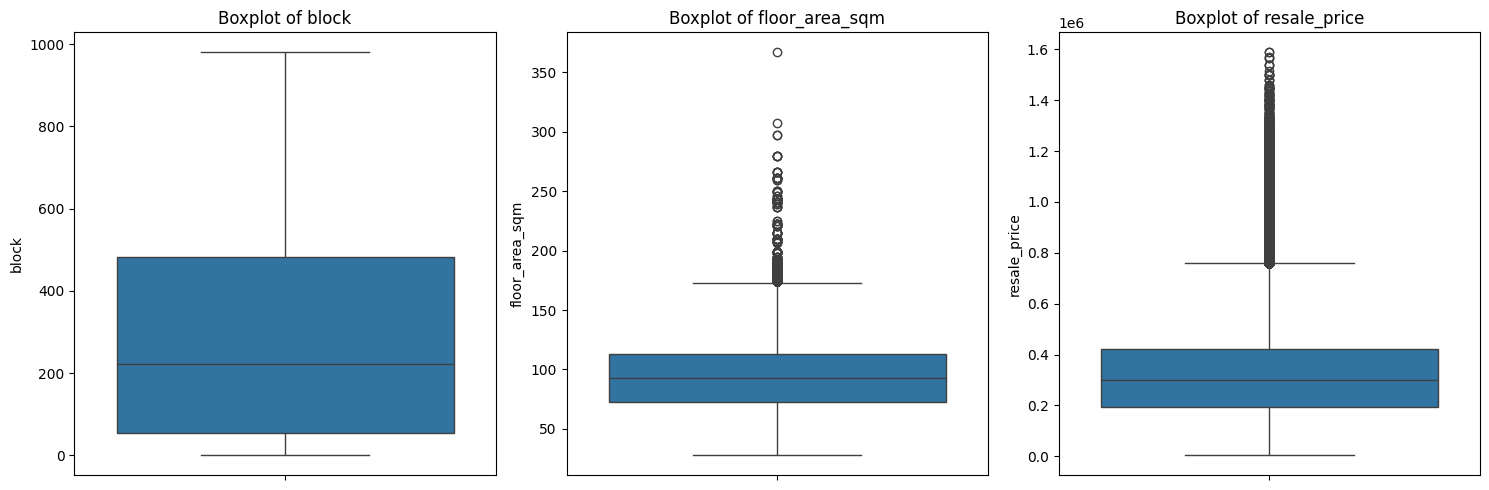

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_of_interest = ['block', 'floor_area_sqm', 'resale_price']
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

for i, column in enumerate(columns_of_interest):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title('Boxplot of {}'.format(column))

plt.tight_layout()
plt.show()

In [39]:
def find_outliers(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Clip values within the bounds
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        
        outliers[column] = (lower_bound, upper_bound)
    return outliers

# Example usage:
outliers = find_outliers(df, ['block', 'floor_area_sqm', 'resale_price'])
print(outliers)

{'block': (-587.0, 1125.0), 'floor_area_sqm': (13.0, 173.0), 'resale_price': (-145000.0, 759000.0)}


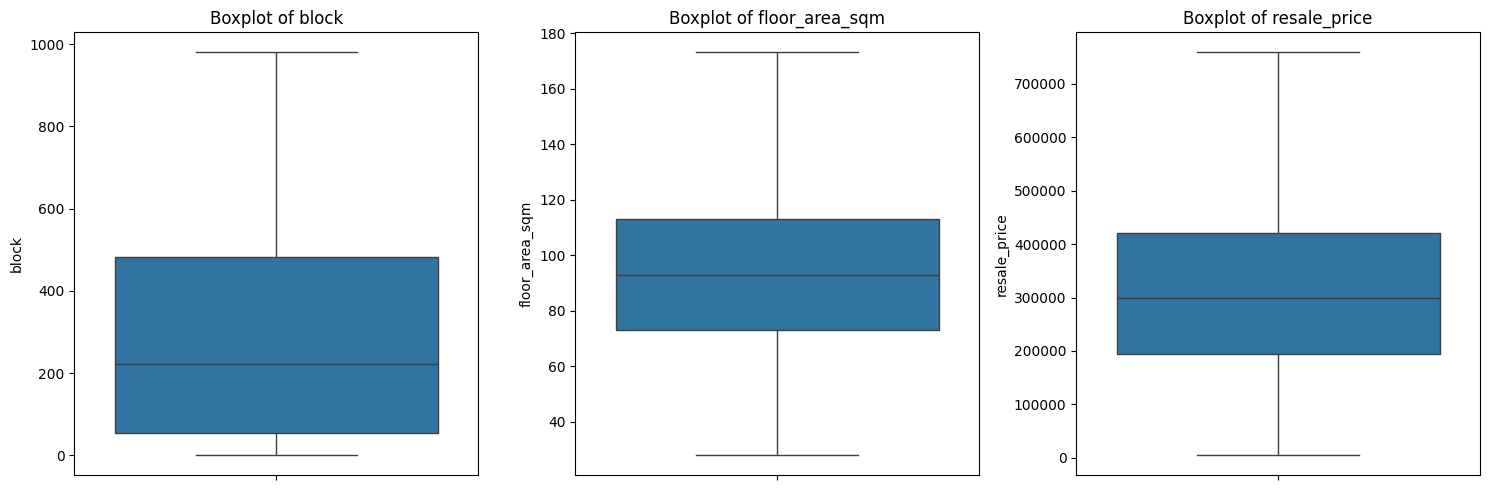

In [40]:
columns_of_interest = ['block', 'floor_area_sqm', 'resale_price']
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

for i, column in enumerate(columns_of_interest):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title('Boxplot of {}'.format(column))

plt.tight_layout()
plt.show()

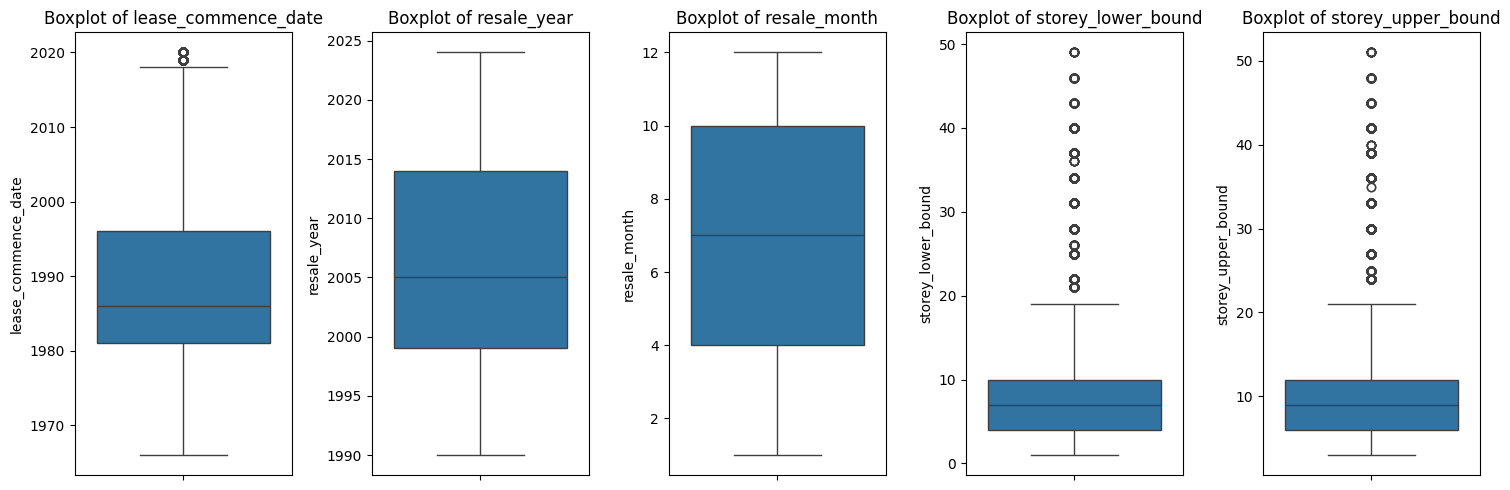

In [41]:
columns_of_interest = ['lease_commence_date',
                        'resale_year',
                        'resale_month',
                        'storey_lower_bound',
                        'storey_upper_bound']
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

for i, column in enumerate(columns_of_interest):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title('Boxplot of {}'.format(column))

plt.tight_layout()
plt.show()

In [42]:
def find_outliers(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Clip values within the bounds
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        
        outliers[column] = (lower_bound, upper_bound)
    return outliers

# Example usage:
outliers = find_outliers(df,['lease_commence_date','resale_year','resale_month','storey_lower_bound','storey_upper_bound'] )
print(outliers)

{'lease_commence_date': (1958.5, 2018.5), 'resale_year': (1976.5, 2036.5), 'resale_month': (-5.0, 19.0), 'storey_lower_bound': (-5.0, 19.0), 'storey_upper_bound': (-3.0, 21.0)}


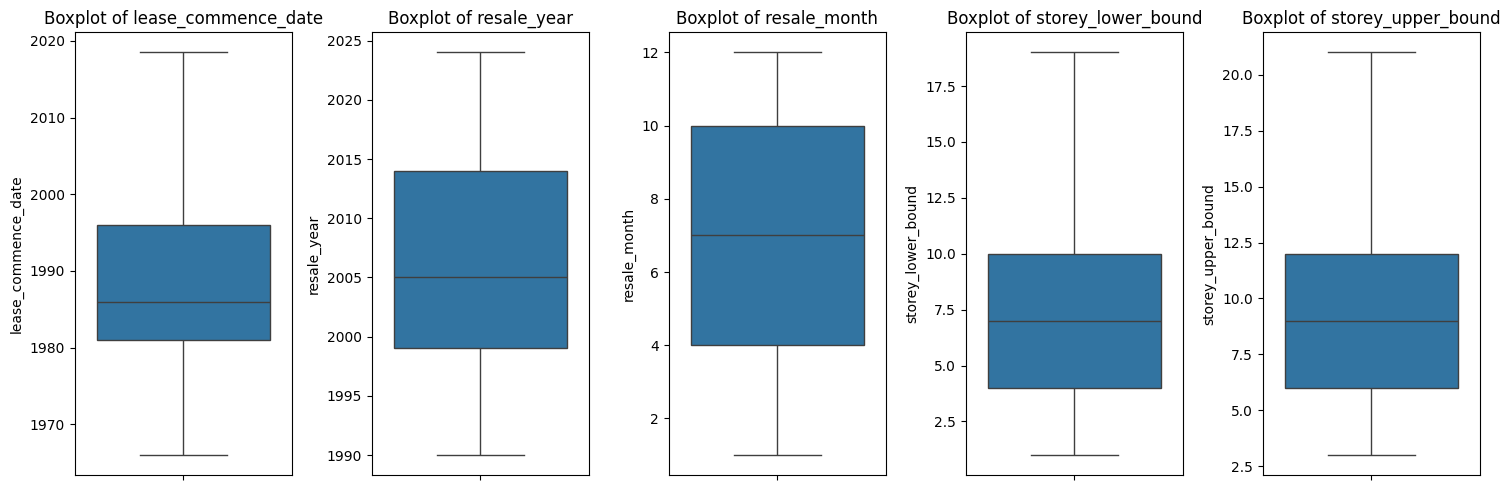

In [43]:
columns_of_interest = ['lease_commence_date',
                        'resale_year',
                        'resale_month',
                        'storey_lower_bound',
                        'storey_upper_bound']
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

for i, column in enumerate(columns_of_interest):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title('Boxplot of {}'.format(column))

plt.tight_layout()
plt.show()

In [44]:
Categorical_cols

['town', 'flat_type', 'street_name', 'flat_model']

EXPLORATARY DATA ANALYSIS (EDA)

In [45]:
def plot_horizontal_bar(df, group_col, value_col, color='skyblue', figsize=(8, 6)): 
    df_grouped = df.groupby(group_col, as_index=False)[value_col].mean()
    
    # Sort by the mean value in descending order
    df_grouped = df_grouped.sort_values(by=value_col, ascending=False)
    
    # Create the horizontal bar plot
    plt.figure(figsize=figsize)
    plt.barh(df_grouped[group_col], df_grouped[value_col], color=color)
    
    # Add title and labels
    plt.title(f'Average {value_col} by {group_col}', fontsize=16)
    plt.xlabel(f'Average {value_col}', fontsize=14)
    plt.ylabel(group_col, fontsize=14)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


In [46]:
def plot_vertical_bar(df, group_col, value_col, color='skyblue', figsize=(8, 6)): 
    df_grouped = df.groupby(group_col, as_index=False)[value_col].mean()
    
    # Sort by the mean value in descending order
    df_grouped = df_grouped.sort_values(by=value_col, ascending=False)
    
    # Create the horizontal bar plot
    plt.figure(figsize=figsize)
    plt.bar(df_grouped[group_col], df_grouped[value_col], color=color)
    
    # Add title and labels
    plt.title(f'Average {value_col} by {group_col}', fontsize=16)
    plt.xlabel(f'Average {value_col}', fontsize=14)
    plt.ylabel(group_col, fontsize=14)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


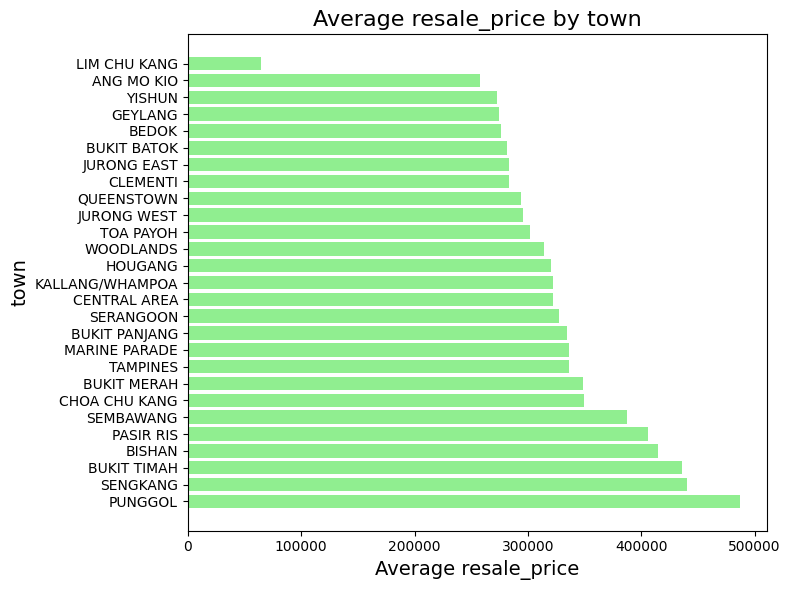

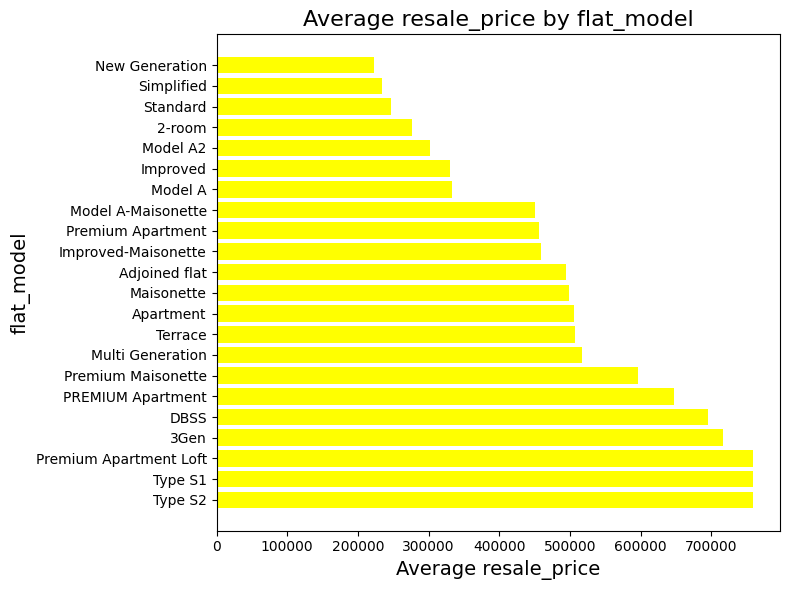

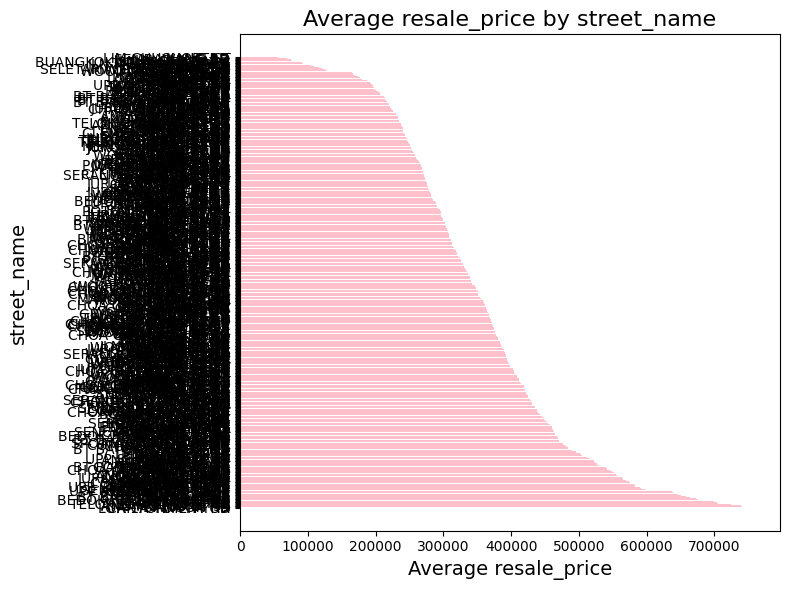

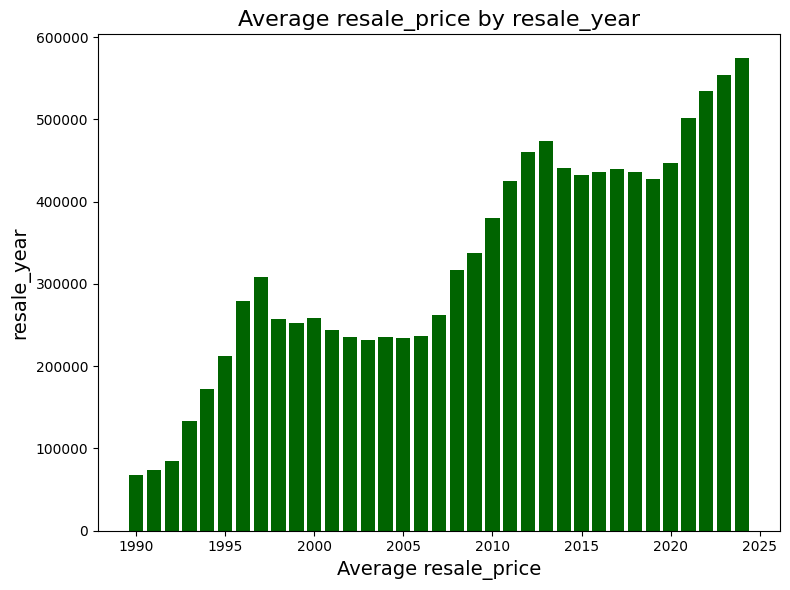

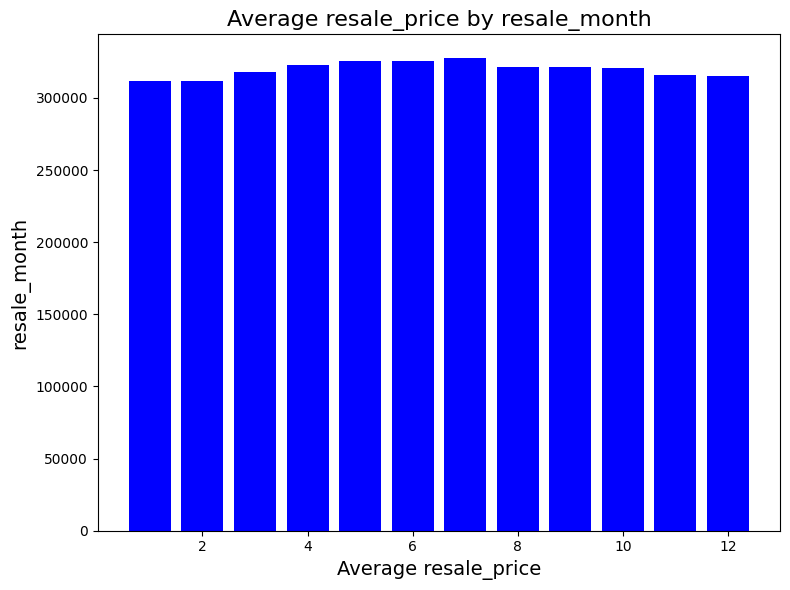

In [47]:

plot_horizontal_bar(df, 'town', 'resale_price', color='lightgreen')
plot_horizontal_bar(df, 'flat_model', 'resale_price', color='yellow')
plot_horizontal_bar(df, 'street_name', 'resale_price', color='pink')
plot_vertical_bar(df, 'resale_year', 'resale_price', color='darkgreen')
plot_vertical_bar(df, 'resale_month', 'resale_price', color='blue')

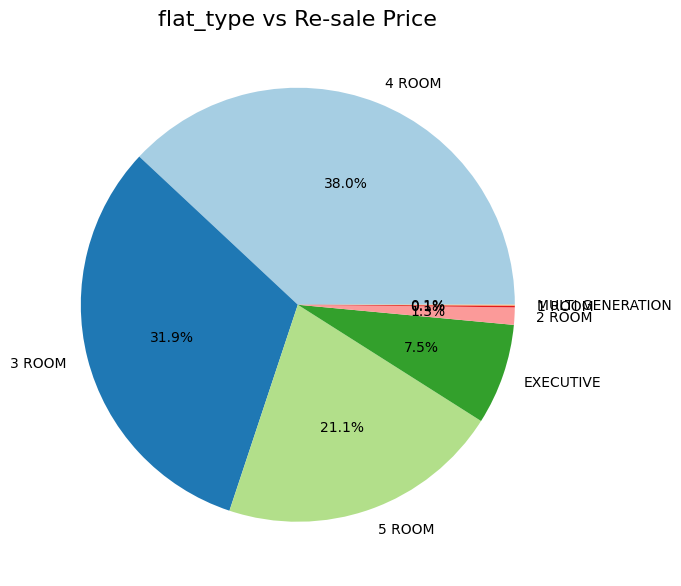

In [48]:
proportions = df['flat_type'].value_counts()
    
# Create the pie chart
plt.figure(figsize=(7, 9))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(proportions))))
    
# Add title
plt.title("flat_type vs Re-sale Price", fontsize=16)
    
# Show the plot
plt.show()

Encoding Categorical Variables

In [49]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [50]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [51]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping


{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [52]:
df1['street_name'] = df1['street_name'].map(streets_mapping)

In [53]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [54]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}
# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

In [55]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}
# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

In [56]:
df1['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [57]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}
# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

In [58]:
df1.to_csv('Processed_data.csv')

Correlation Matrix

<Axes: >

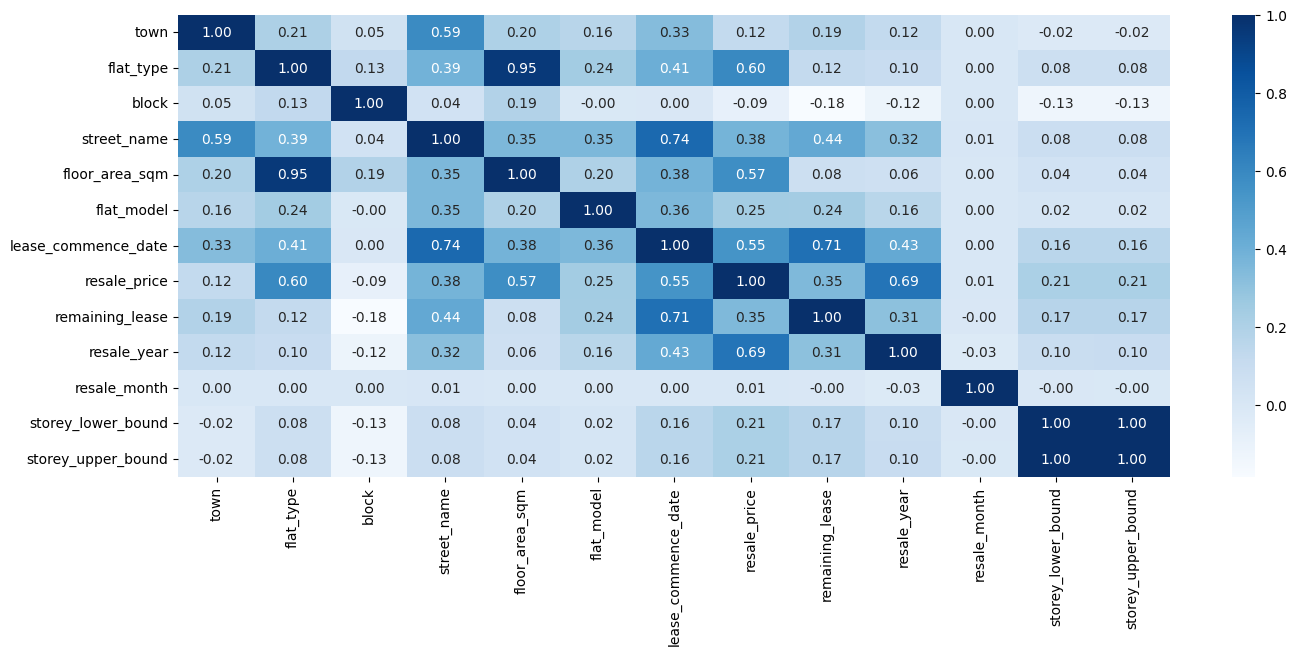

In [59]:
corrm=df1.corr()
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

In [60]:
df1.isna().any().any()

True

In [61]:
nan_columns = df1.columns[df1.isna().any()].tolist()

print("Columns with NaN values:", nan_columns)

Columns with NaN values: ['flat_model']


In [62]:
df1['flat_model']=df1['flat_model'].mode()[0]

In [63]:
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,16.0,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,16.0,1977.0,6000.0,68.0,1990,1,4,6


In [64]:
df['storey_upper_bound'].min()

3

In [65]:
X = df1.drop('resale_price', axis= 1)
y = df1['resale_price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [66]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(743807, 12) (185952, 12) (743807,) (185952,)


In [67]:
#Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[-0.46991   , -1.07031696, -1.06726313, ...,  0.42471875,
         -0.58110531, -0.58446741],
        [ 0.42769095, -0.01551416, -1.10532244, ..., -0.16249576,
         -1.25478221, -1.25827457],
        [-0.5981387 , -1.07031696,  0.3180959 , ..., -0.74971026,
          0.76624848,  0.76314692],
        ...,
        [ 1.45352059,  1.03928864, -0.18809298, ..., -0.16249576,
          1.43992538,  1.43695408],
        [ 0.42769095, -0.01551416, -1.10532244, ...,  0.1311115 ,
         -0.58110531, -0.58446741],
        [-1.23928223, -0.01551416,  0.44749756, ...,  0.718326  ,
         -0.58110531, -0.58446741]]),
 array([[-0.08522388, -0.01551416, -1.10532244, ...,  0.1311115 ,
          1.43992538,  1.43695408],
        [ 1.06883447, -1.07031696,  1.83285659, ...,  1.30554051,
         -0.58110531, -0.58446741],
        [-1.49573964, -0.01551416, -1.10532244, ...,  0.1311115 ,
          0.09257159,  0.08933976],
        ...,
        [ 0.94060577,  1.03928864,  0.89659747, ...,  

MODEL FITTING

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[322863.8947247  169732.31769721 406236.41147074 ... 514905.72048457
  84580.14225389 188341.09276484]
470924    258000.0
509743    139500.0
923895    648000.0
489261    295000.0
132947    188000.0
            ...   
542811    255500.0
818943    580000.0
685696    426800.0
106440    160000.0
85954     240000.0
Name: resale_price, Length: 185952, dtype: float64


In [70]:
print("Linear Model Score: ",linear_model.score(X_test, y_test))

Linear Model Score:  0.7961743159686391


In [71]:
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
print("Cross Validation score for Linear Model: ",cross_val_linear_model)

Cross Validation score for Linear Model:  0.7951228290946027


KNN (K Nearest Neighbor) REGRESSION

In [72]:
import numpy as np

In [73]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 28496.45217520651
Mean Squared Error (MSE)     : 1746823341.2669294
Root Mean Square Error (RMSE): 41795.01574670034
R-squared (R2) Score         : 0.9353245856529048


DECISION TREE REGRESSION

In [74]:
# Create and train the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=11)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 17650.769649159192
Mean Squared Error (MSE)     : 697200898.0685956
Root Mean Square Error (RMSE): 26404.562069244694
R-squared (R2) Score         : 0.9741864240644682


RANDOM FOREST REGRESSION

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)

XGB REGRESSION

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
XGB_regressor = XGBRegressor(random_state=42)
XGB_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_Xgb = XGB_regressor.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae_Xgb = mean_absolute_error(y_test, y_pred_Xgb)

# Calculate Mean Squared Error (MSE)
mse_Xgb = mean_squared_error(y_test, y_pred_Xgb)

# Calculate Root Mean Squared Error (RMSE)
rmse_Xgb = np.sqrt(mse)

# Calculate R-squared (R2) Score
Xgb_r2 = r2_score(y_test, y_pred_Xgb)

print("Mean Absolute Error (MAE)    :", mae_Xgb)
print("Mean Squared Error (MSE)     :", mse_Xgb)
print("Root Mean Square Error (RMSE):", rmse_Xgb)
print("R-squared (R2) Score         :", Xgb_r2)

Mean Absolute Error (MAE)    : 17217.502962059134
Mean Squared Error (MSE)     : 578963326.8823289
Root Mean Square Error (RMSE): 20348.559741869572
R-squared (R2) Score         : 0.9785641214121117


DataFrame of R² Scores for Regression Models:

                   Model  R² Score
0    KNeighborsRegressor  0.935325
1  DecisionTreeRegressor  0.974186
2  RandomForestRegressor  0.984669
3       XGBoostRegressor  0.978564


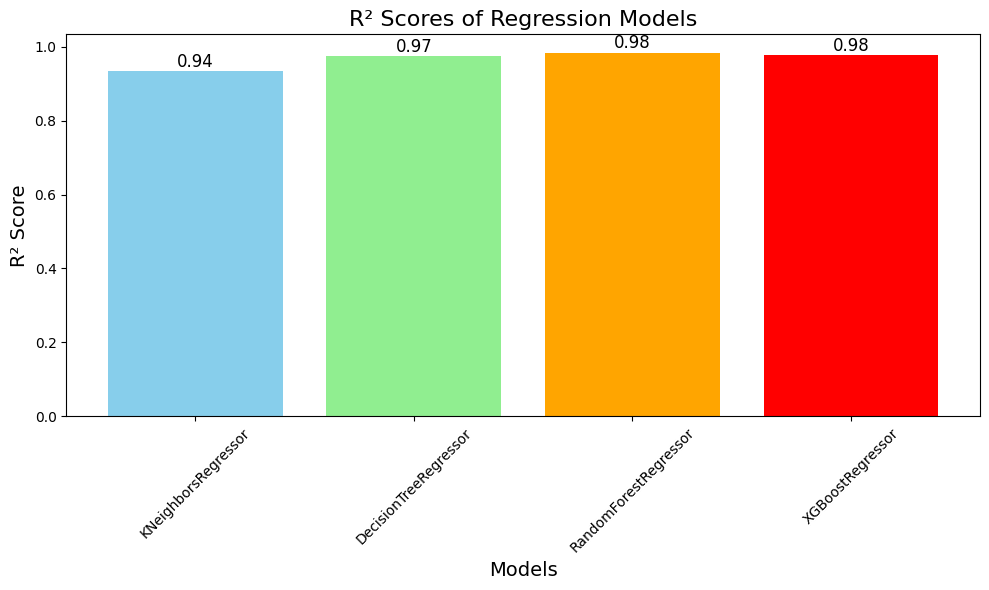


Model: RandomForestRegressor has the Maximum R² Score: 0.9846694553459922


In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Add the XGBoost Regressor to your models
models = ['KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGBoostRegressor']
scores = [r2_knn, r2_dt, rf_r2, Xgb_r2]  # Assuming you have calculated r2_xgb for XGBoost

# Create a DataFrame with the model names and R² scores
results_df = pd.DataFrame({
    'Model': models,
    'R² Score': scores
})

# Display the DataFrame
print("DataFrame of R² Scores for Regression Models:\n")
print(results_df)

# Plot the R² scores using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(results_df['Model'], results_df['R² Score'], color=['skyblue', 'lightgreen', 'orange', 'red'])

# Add a title and labels
ax.set_title('R² Scores of Regression Models', fontsize=16)
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('R² Score', fontsize=14)

# Annotate the R² scores on top of the bars
for bar, score in zip(bars, results_df['R² Score']):
    height = bar.get_height()
    ax.annotate(f'{score:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find the model with the maximum R² score
max_score = results_df['R² Score'].max()
best_model = results_df.loc[results_df['R² Score'] == max_score, 'Model'].values[0]

print(f"\nModel: {best_model} has the Maximum R² Score: {max_score}")

In [78]:
model_sf=rf_regressor.fit(X_train, y_train)
model_sf

RandomForestRegressor(random_state=42)

In [79]:
import pickle

import pickle

Dir = 'D:/Guvi_Data_Science/MDT33/Capstone_Project/Singapore-Resale-Flat/'

# Saving the KNN model
with open(Dir + 'model_sf.pkl', 'wb') as file:
    pickle.dump(model_sf, file)

In [1]:
#Predictions

pre_df =df1.sample(n=5)
pre_df

NameError: name 'df1' is not defined